Note: O1-O3 data is coming from the GWTC1 - GWTC3 catalogs. O4 data is being pulled off of GraceDB (O3 can also be pulled off of GDB but we will use GWTC3 data instead since it contains luminosity distances.) 

In [133]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [4]:
#O1_all = pd.read_csv("../Data/GWTC-1.csv")
O1_all = pd.read_csv("../Data/GWTC-1-confident.csv")
O2_all = pd.read_csv("../Data/GWTC-2.csv")
#O3_all = pd.read_csv("../Data/GWTC-3.csv")
O3_all = pd.read_csv("../Data/GWTC-3-confident.csv")
O4_all = pd.read_csv("../Data/real_events_O4_ALL.csv")

In [5]:
print(len(O1_all), " events in O1")
print(len(O2_all), " events in O2")
print(len(O3_all), " events in O3")
print(len(O4_all), " events in O4 ... so far ...")

11  events in O1
39  events in O2
35  events in O3
53  events in O4 ... so far ...


In [8]:
O1_all.columns

Index(['name', 'total_mass_source_upper', 'redshift_upper', 'p_astro_lower',
       'chirp_mass_source_upper', 'mass_1_source_upper', 'commonName',
       'chi_eff_upper', 'far_lower', 'catalog.shortName', 'far_upper',
       'total_mass_source_lower', 'network_matched_filter_snr_lower',
       'mass_1_source_lower', 'reference', 'version', 'jsonurl',
       'final_mass_source_lower', 'redshift', 'final_mass_source',
       'chirp_mass', 'total_mass_source', 'mass_1_source', 'GPS',
       'chi_eff_lower', 'network_matched_filter_snr', 'far',
       'final_mass_source_upper', 'mass_2_source', 'p_astro_upper',
       'luminosity_distance', 'chirp_mass_lower', 'chirp_mass_upper',
       'network_matched_filter_snr_upper', 'luminosity_distance_upper',
       'chirp_mass_source_lower', 'redshift_lower', 'mass_2_source_upper',
       'luminosity_distance_lower', 'mass_2_source_lower', 'chirp_mass_source',
       'p_astro', 'chi_eff'],
      dtype='object')

Defintion of chirp mass (GWTC1_confident and GWTC3_confident don't have it)
$$\mathscr{M} = \frac{(m_1 m_2)^{3/5}}{(m_1 + m_2)^{1/5}}$$

In [19]:
#def chirp_mass(mass_1, mass_2):
#    chirp_mass = (mass_1 * mass_2)**(3/5)/(mass_1 + mass_2)**(1/5)
#    return chirp_mass

dfs = [O1_all, O3_all]
for row in dfs:
    chirp_mass = (row["mass_1_source"] * row["mass_2_source"])**(3/5)/(row["mass_1_source"] + row["mass_2_source"])**(1/5)
    row["chirp_mass"] = chirp_mass

In [23]:
# list of possible mpl colors given here: https://matplotlib.org/stable/gallery/color/named_colors.html

# list of possible mpl markers : https://matplotlib.org/stable/api/markers_api.html

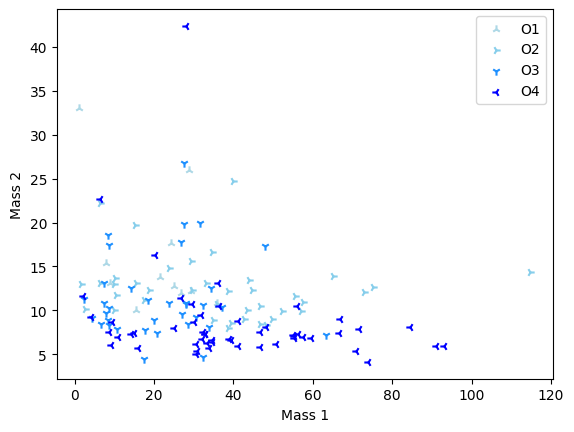

In [26]:
plt.scatter(O1_all["chirp_mass"], O1_all["network_matched_filter_snr"], color = "lightblue", label = "O1", marker = "2")
plt.scatter(O2_all["chirp_mass"], O2_all["network_matched_filter_snr"], color = "skyblue", label = "O2", marker = "4")
plt.scatter(O3_all["chirp_mass"], O3_all["network_matched_filter_snr"], color = "dodgerblue", label = "O3", marker = "1")
plt.scatter(O4_all["chirp_mass"], O4_all["snr"], color = "blue", label = "O4", marker = "3")
plt.xlabel("Mass 1")
plt.ylabel("Mass 2")
plt.legend()

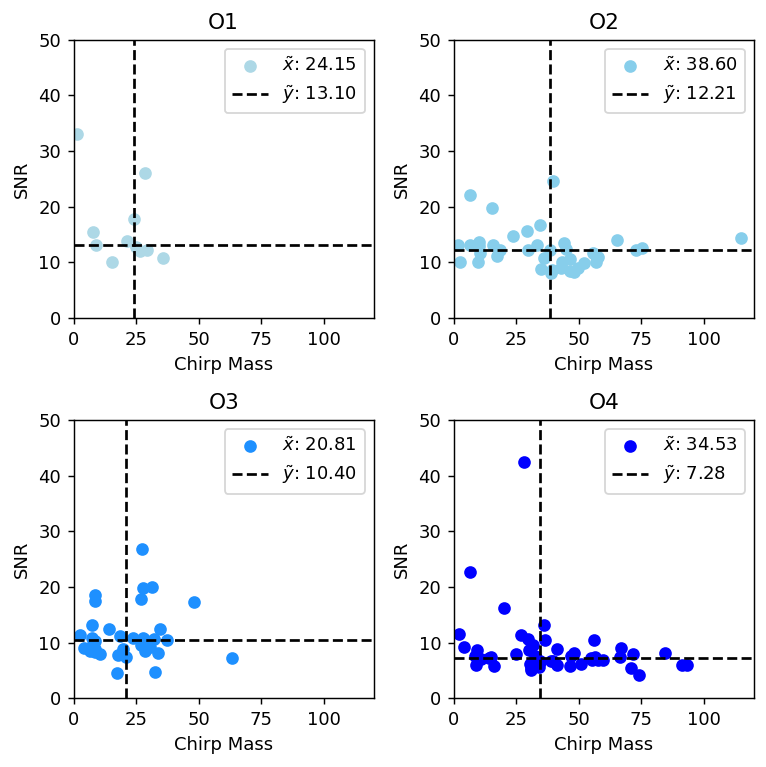

In [152]:
fig, ax = plt.subplots(2, 2, figsize=(6, 6), dpi = 130)

# Scatter plot code with labels
ax[0, 0].scatter(O1_all["chirp_mass"], O1_all["network_matched_filter_snr"], color="lightblue", label="O1")
ax[0, 1].scatter(O2_all["chirp_mass"], O2_all["network_matched_filter_snr"], color="skyblue", label="O2")
ax[1, 0].scatter(O3_all["chirp_mass"], O3_all["network_matched_filter_snr"], color="dodgerblue", label="O3")
ax[1, 1].scatter(O4_all["chirp_mass"], O4_all["snr"], color="blue", label="O4")

# Calculate median chirp mass for each dataset
median_chirp_mass_O1 = np.median(O1_all["chirp_mass"])
median_chirp_mass_O2 = np.median(O2_all["chirp_mass"])
median_chirp_mass_O3 = np.median(O3_all["chirp_mass"])
median_chirp_mass_O4 = np.median(O4_all["chirp_mass"])

# Add vertical black lines representing the median chirp mass
ax[0, 0].axvline(median_chirp_mass_O1, color="black", linestyle="--")
ax[0, 1].axvline(median_chirp_mass_O2, color="black", linestyle="--")
ax[1, 0].axvline(median_chirp_mass_O3, color="black", linestyle="--")
ax[1, 1].axvline(median_chirp_mass_O4, color="black", linestyle="--")

# Calculate median SNR for each dataset
median_snr_O1 = np.median(O1_all["network_matched_filter_snr"])
median_snr_O2 = np.median(O2_all["network_matched_filter_snr"])
median_snr_O3 = np.median(O3_all["network_matched_filter_snr"])
median_snr_O4 = np.median(O4_all["snr"])

# Add horizontal black lines representing the median SNR
ax[0, 0].axhline(median_snr_O1, color="black", linestyle="--")
ax[0, 1].axhline(median_snr_O2, color="black", linestyle="--")
ax[1, 0].axhline(median_snr_O3, color="black", linestyle="--")
ax[1, 1].axhline(median_snr_O4, color="black", linestyle="--")

# Add legends to each subplot with LaTeX expression for median and actual values
ax[0, 0].legend([f'$\\tilde{{x}}$: {median_chirp_mass_O1:.2f}', f'$\\tilde{{y}}$: {median_snr_O1:.2f}'])
ax[0, 1].legend([f'$\\tilde{{x}}$: {median_chirp_mass_O2:.2f}', f'$\\tilde{{y}}$: {median_snr_O2:.2f}'])
ax[1, 0].legend([f'$\\tilde{{x}}$: {median_chirp_mass_O3:.2f}', f'$\\tilde{{y}}$: {median_snr_O3:.2f}'])
ax[1, 1].legend([f'$\\tilde{{x}}$: {median_chirp_mass_O4:.2f}', f'$\\tilde{{y}}$: {median_snr_O4:.2f}'])

common_xlimits = (0, 120) 
common_ylimits = (0, 50) 

for row in ax:
    for subplot in row:
        subplot.set_xlim(common_xlimits)
        subplot.set_ylim(common_ylimits)


ax[0, 0].set_xlabel("Chirp Mass")
ax[0, 0].set_ylabel("SNR")

ax[0, 1].set_xlabel("Chirp Mass")
ax[0, 1].set_ylabel("SNR")

ax[1, 0].set_xlabel("Chirp Mass")
ax[1, 0].set_ylabel("SNR")

ax[1, 1].set_xlabel("Chirp Mass")
ax[1, 1].set_ylabel("SNR")

ax[0, 0].set_title("O1")
ax[0, 1].set_title("O2")
ax[1, 0].set_title("O3")
ax[1, 1].set_title("O4")

plt.tight_layout()

In [121]:
# changing the name of the snr column in the O4 data so that the loop can be constructed
O4_all["network_matched_filter_snr"] = O4_all["snr"]

O4_all["mass_1_source"] = O4_all["mass1"]
O4_all["mass_2_source"] = O4_all["mass2"]

O4_all["far"] = O4_all["combined_far"]

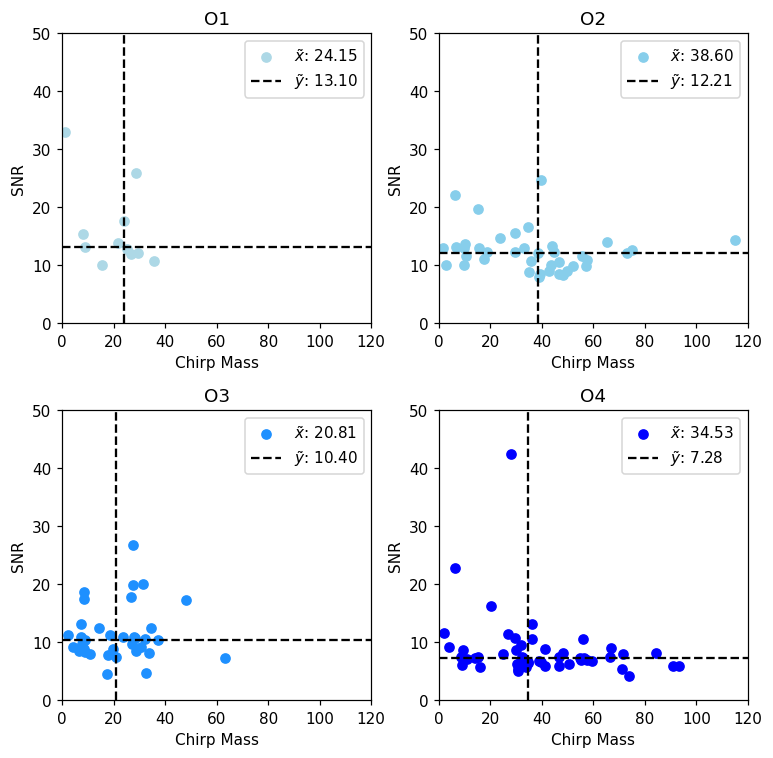

In [65]:
fig, ax = plt.subplots(2, 2, figsize=(7, 7), dpi=110)

datasets = [O1_all, O2_all, O3_all, O4_all]

dataset_labels = ["O1", "O2", "O3", "O4"]

colors = ["lightblue", "skyblue", "dodgerblue", "blue"]

left_index = [0,0,1,1]
right_index = [0,1,0,1]

for dataset, dataset_label, color, li, ri in zip(datasets, dataset_labels, colors, left_index, right_index):

    ax[li, ri].scatter(dataset["chirp_mass"], dataset["network_matched_filter_snr"], color=color, label=dataset_label)

    median_chirp_mass = np.median(dataset["chirp_mass"])
    median_snr = np.median(dataset["network_matched_filter_snr"])

    ax[li, ri].axvline(median_chirp_mass, color="black", linestyle="--")
    ax[li, ri].axhline(median_snr, color="black", linestyle="--")

    ax[li, ri].legend([f'$\\tilde{{x}}$: {median_chirp_mass:.2f}', f'$\\tilde{{y}}$: {median_snr:.2f}'])

    ax[li, ri].set_xlim(0, 120)
    ax[li, ri].set_ylim(0, 50)

    ax[li, ri].set_xlabel("Chirp Mass")
    ax[li, ri].set_ylabel("SNR")

    ax[li, ri].set_title(dataset_label)

plt.tight_layout()

plt.show()


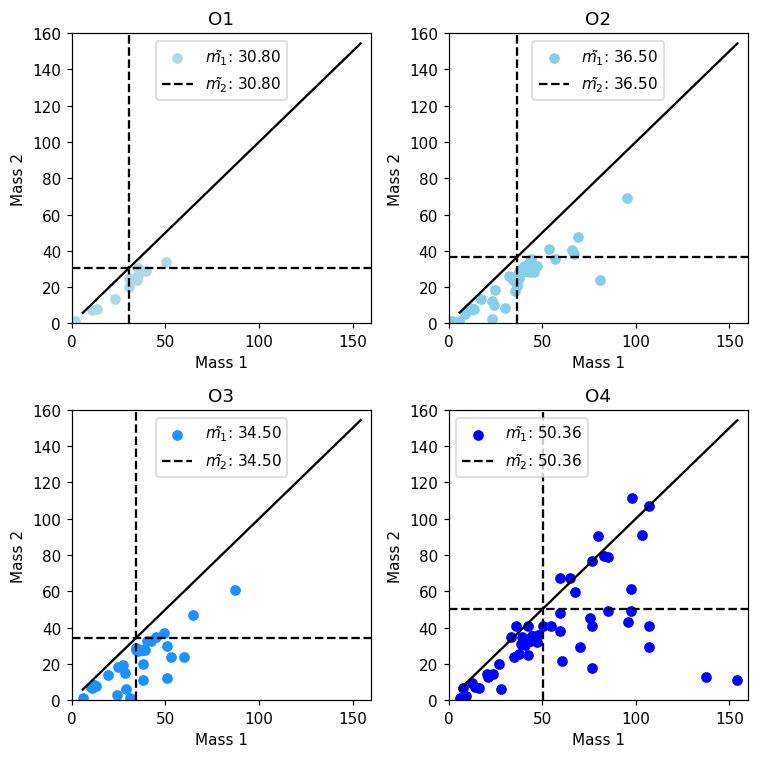

In [87]:
fig, ax = plt.subplots(2, 2, figsize=(7, 7), dpi=110)

datasets = [O1_all, O2_all, O3_all, O4_all]

dataset_labels = ["O1", "O2", "O3", "O4"]

colors = ["lightblue", "skyblue", "dodgerblue", "blue"]

left_index = [0,0,1,1]
right_index = [0,1,0,1]
x = np.linspace(min(O4_all["mass_1_source"]), max(O4_all["mass_1_source"]), 100)
for dataset, dataset_label, color, li, ri in zip(datasets, dataset_labels, colors, left_index, right_index):

    ax[li, ri].scatter(dataset["mass_1_source"], dataset["mass_2_source"], color=color, label=dataset_label)

    median_chirp_mass = np.median(dataset["mass_1_source"])
    median_snr = np.median(dataset["mass_1_source"])

    ax[li, ri].axvline(median_chirp_mass, color="black", linestyle="--")
    ax[li, ri].axhline(median_snr, color="black", linestyle="--")

    ax[li,ri].plot(x,x, color = "black", label = "$\\{m_1} = \\{m_2}$")
    
    ax[li, ri].legend([f'$\\tilde{{m_1}}$: {median_chirp_mass:.2f}', f'$\\tilde{{m_2}}$: {median_snr:.2f}'])

    ax[li, ri].set_xlim(0, 160)
    ax[li, ri].set_ylim(0, 160)
    
    ax[li, ri].set_xlabel("Mass 1")
    ax[li, ri].set_ylabel("Mass 2")

    ax[li, ri].set_title(dataset_label)

plt.tight_layout()

plt.show()


$$\chi_{\text{eff}} = \frac{\vec{S_1}/m_1+\vec{S_2}/m_2}{m_1+m_2} \cdot \hat{L}$$

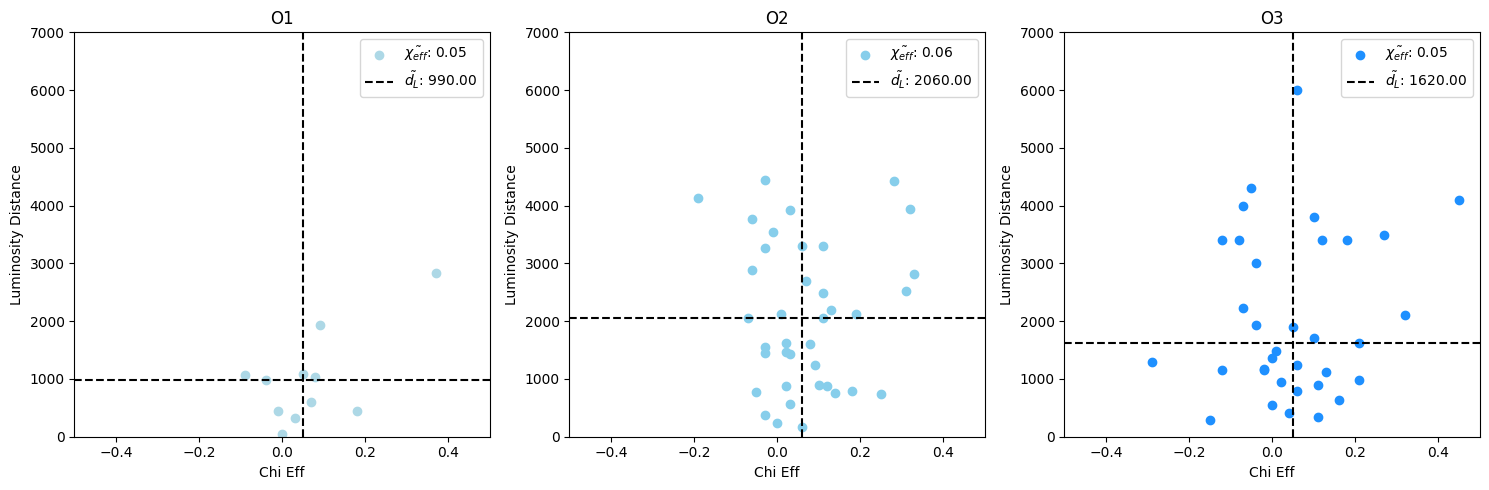

In [112]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

datasets = [O1_all, O2_all, O3_all]

dataset_labels = ["O1", "O2", "O3"]

colors = ["lightblue", "skyblue", "dodgerblue"]

right_index = [0,1,2]

for dataset, dataset_label, color, li, ri in zip(datasets, dataset_labels, colors, left_index, right_index):

    ax[ri].scatter(dataset["chi_eff"], dataset["luminosity_distance"], color=color, label=dataset_label)

    median_chi_eff = np.median(dataset["chi_eff"])
    median_luminosity_distance = np.median(dataset["luminosity_distance"])

    ax[ri].axvline(median_chi_eff, color="black", linestyle="--")
    ax[ri].axhline(median_luminosity_distance, color="black", linestyle="--")
    
    ax[ri].legend([f'$\\tilde{{\\chi_{{eff}}}}$: {median_chi_eff:.2f}', f'$\\tilde{{d_L}}$: {median_luminosity_distance:.2f}'])

    # remember that these limits were manually set
    ax[ri].set_xlim(-.5, .5)
    ax[ri].set_ylim(0, 7000)
    
    ax[ri].set_xlabel("Chi Eff")
    ax[ri].set_ylabel("Luminosity Distance")

    ax[ri].set_title(dataset_label)

plt.tight_layout()

plt.show()


### t-SNE plots for O1-O4: 

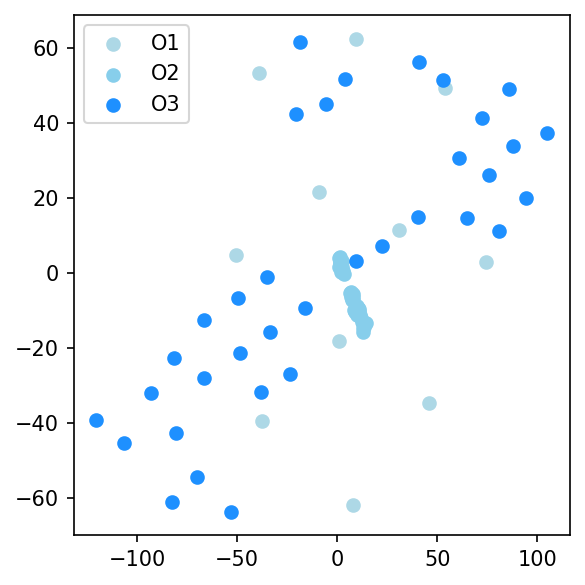

In [132]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=150)

datasets = [O1_all, O2_all, O3_all, O4_all]

dataset_labels = ["O1", "O2", "O3", "O4"]

colors = ["lightblue", "skyblue", "dodgerblue", "blue"]

variables = ["mass_1_source", "mass_2_source", "chirp_mass", "far"]

for dataset, dataset_label, color, li, ri in zip(datasets, dataset_labels, colors, left_index, right_index):


    tsne = TSNE(n_components=2, perplexity=10,random_state=42)

    X_tsne = tsne.fit_transform(dataset[variables])
    
    ax.scatter(X_tsne[:, 0], X_tsne[:, 1],color = color, label= dataset_label)

ax.legend()

plt.tight_layout()

plt.show()

# notice that O4 isn't present right now. Must not have a parameter defined correctly. 

# Hiroki, would you look into this? What are the parameters that we can use across O1-O3 AND O4 
# Example: luminosity distance is defined in the O1-O3 data but NOT for O4. What are the parameters we can use for all data? 

For just O1-O3 (so I know they have the exact same parameter definitions):

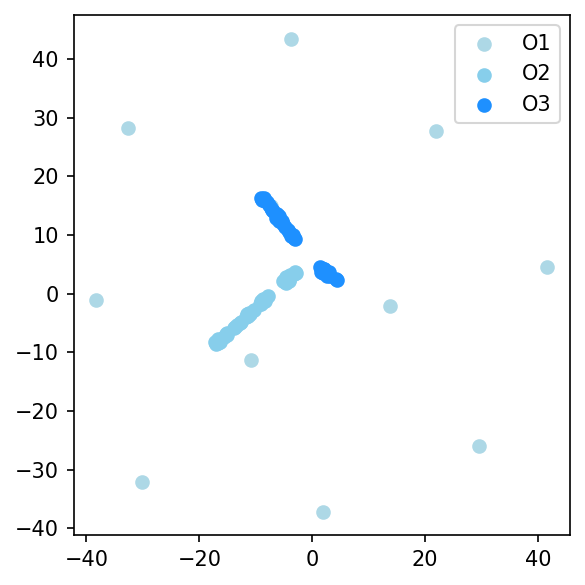

In [143]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=150)

datasets = [O1_all, O2_all, O3_all]

dataset_labels = ["O1", "O2", "O3"]

colors = ["lightblue", "skyblue", "dodgerblue"]

# NOTE: pastro contains NaNs. We should first make a check that all of the entries in a column do not contain NaNs. If they do, add code to remove that row of data and continue. 

variables = ["mass_1_source", "mass_2_source", "chirp_mass", "far", "chi_eff", "luminosity_distance", "redshift", "network_matched_filter_snr"]

for dataset, dataset_label, color, li, ri in zip(datasets, dataset_labels, colors, left_index, right_index):


    tsne = TSNE(n_components=2, perplexity=10,random_state=42)

    X_tsne = tsne.fit_transform(dataset[variables])
    
    ax.scatter(X_tsne[:, 0], X_tsne[:, 1],color = color, label= dataset_label)

ax.legend()

plt.tight_layout()

plt.show()


## Quantifying some properties

Below is an example of using the Pearson correlation coefficent. 

The Pearson correlation coefficent is defined as:
$$\rho_{X,Y} = \frac{\text{cov}(X,Y)}{\sigma_X \sigma_Y}$$

Where $\sigma_X$, the standard deviation of $X$, is defined as: 
$$\sigma_X = \sqrt{\sum_{i=1}^{N}p_i(x_i-\mu_X)^2}$$
where $\mu$ is the mean of $X$ and $p_i$ is the probability of the $x_i$ state.

$\text{cov}(X,Y)$ is defined as:
$$\text{cov}(X,Y) = \frac{1}{n} \sum_{i=0}^N (x_i- \mu_X)(y_i-\mu_Y)$$

so the Pearson correlation coefficent is defined as: 

$$\rho_{X,Y} = \frac{\frac{1}{n} \sum_{i=0}^N (x_i- \mu_X)(y_i-\mu_Y)}{\sqrt{\sum_{i=1}^{N}p_i(x_i-\mu_X)^2}\sqrt{\sum_{i=1}^{N}p_i(y_i-\mu_Y)^2}}$$

I expect that the redshift of an event would be almost exactly linear with the luminosity distance so I expect a $\rho$ value for redshift and luminosity distance to be near 1. This use is just a test of the Pearson correlation coefficent. 

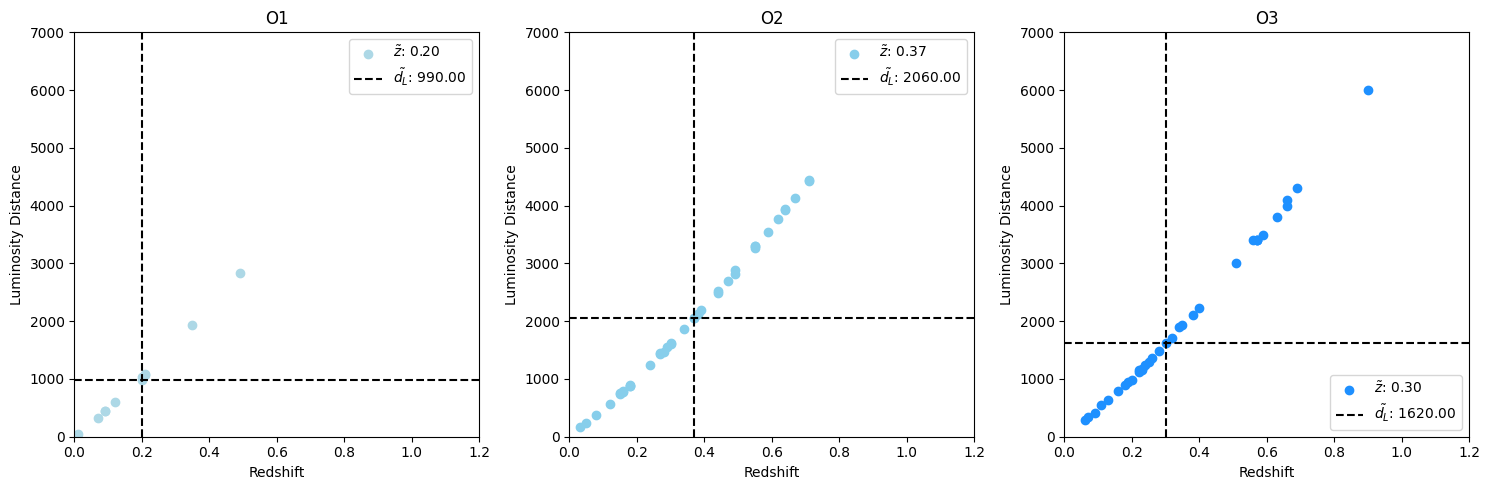

In [148]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

datasets = [O1_all, O2_all, O3_all]

dataset_labels = ["O1", "O2", "O3"]

colors = ["lightblue", "skyblue", "dodgerblue"]

right_index = [0,1,2]

for dataset, dataset_label, color, li, ri in zip(datasets, dataset_labels, colors, left_index, right_index):

    ax[ri].scatter(dataset["redshift"], dataset["luminosity_distance"], color=color, label=dataset_label)

    median_chi_eff = np.median(dataset["redshift"])
    median_luminosity_distance = np.median(dataset["luminosity_distance"])

    ax[ri].axvline(median_chi_eff, color="black", linestyle="--")
    ax[ri].axhline(median_luminosity_distance, color="black", linestyle="--")
    
    ax[ri].legend([f'$\\tilde{{z}}$: {median_chi_eff:.2f}', f'$\\tilde{{d_L}}$: {median_luminosity_distance:.2f}'])

    # remember that these limits are manually set
    ax[ri].set_xlim(0, 1.2)
    ax[ri].set_ylim(0, 7000)
    
    ax[ri].set_xlabel("Redshift")
    ax[ri].set_ylabel("Luminosity Distance")

    ax[ri].set_title(dataset_label)

plt.tight_layout()

plt.show()
